In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
data = pd.read_csv('FlightDelays.csv')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


In [30]:
data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [31]:
data.nunique()

CRS_DEP_TIME      59
CARRIER            8
DEP_TIME         633
DEST               3
DISTANCE           7
FL_DATE           31
FL_NUM           103
ORIGIN             3
Weather            2
DAY_WEEK           7
DAY_OF_MONTH      31
TAIL_NUM         549
Flight Status      2
dtype: int64

In [32]:
data['Flight Status'].value_counts()

ontime     1773
delayed     428
Name: Flight Status, dtype: int64

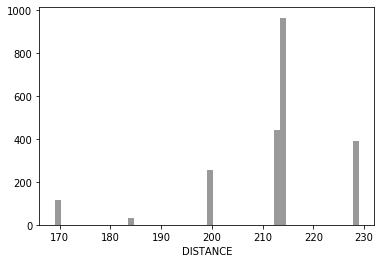

In [33]:
sns.distplot(data['DISTANCE'],kde = False,color = 'black')

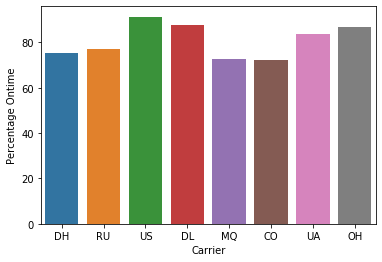

In [34]:
carrier_percentage = []
for x in data['CARRIER'].value_counts().index.values:
    ontime = data[data['CARRIER'] == x]['Flight Status'].value_counts()['ontime']
    late = data[data['CARRIER'] == x]['Flight Status'].value_counts()['delayed']
    per = (ontime/(ontime+late))*100 
    carrier_percentage.append(per)  
fig1 = sns.barplot( x= data['CARRIER'].value_counts().index.values, y = carrier_percentage)
fig1.set(xlabel = 'Carrier', ylabel = 'Percentage Ontime')
plt.show()

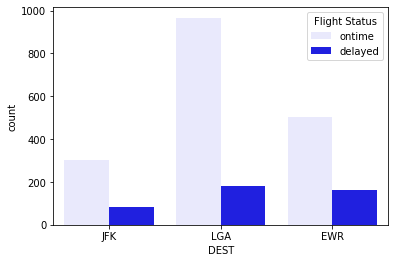

In [35]:
sns.countplot(x='DEST', data= data ,hue='Flight Status',color = 'blue')

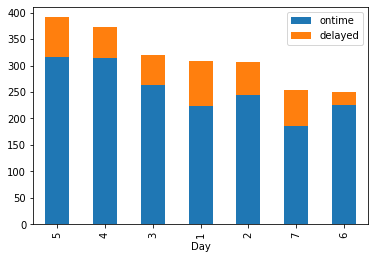

In [36]:
week_per = pd.DataFrame(columns = ['ontime','delayed'])

for x in data['DAY_WEEK'].value_counts().index.values:
    on = data[data['DAY_WEEK'] == x]['Flight Status'].value_counts()['ontime']
    late = data[data['DAY_WEEK'] == x]['Flight Status'].value_counts()['delayed']
    week_per.loc[len(week_per.index)] = [ on, late]
days = data['DAY_WEEK'].value_counts().index.values
week_per['Day'] = days
week_per.set_index('Day',inplace = True)
week_per.plot(kind = 'bar',stacked = True)

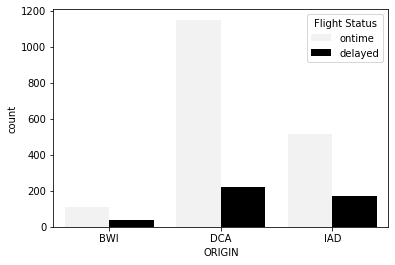

In [37]:
sns.countplot(x='ORIGIN', data= data ,hue='Flight Status',color = 'black')

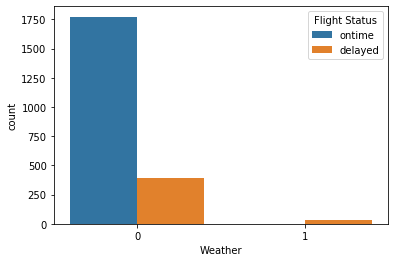

In [38]:
sns.countplot(x='Weather', data= data ,hue='Flight Status')

In [39]:
final = data.drop(['FL_DATE','TAIL_NUM'],axis=1)
status = pd.get_dummies(final['Flight Status'],drop_first=True)
destination = pd.get_dummies(final['DEST'])
carrier = pd.get_dummies(final['CARRIER'])
origin = pd.get_dummies(final['ORIGIN'])
final = pd.concat([final,status,destination,carrier,origin],axis =1)
final.ontime = final.ontime.astype(float)
final.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,...,DH,DL,MQ,OH,RU,UA,US,BWI,DCA,IAD
0,1455,OH,1455,JFK,184,5935,BWI,0,4,1,...,0,0,0,1,0,0,0,1,0,0
1,1640,DH,1640,JFK,213,6155,DCA,0,4,1,...,1,0,0,0,0,0,0,0,1,0
2,1245,DH,1245,LGA,229,7208,IAD,0,4,1,...,1,0,0,0,0,0,0,0,0,1
3,1715,DH,1709,LGA,229,7215,IAD,0,4,1,...,1,0,0,0,0,0,0,0,0,1
4,1039,DH,1035,LGA,229,7792,IAD,0,4,1,...,1,0,0,0,0,0,0,0,0,1


In [40]:
#TTS for model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final.drop(['ontime','Flight Status','ORIGIN','DEST','CARRIER'],axis=1),final['ontime'], test_size=0.40,random_state=101)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 2056 to 863
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   CRS_DEP_TIME  1320 non-null   int64
 1   DEP_TIME      1320 non-null   int64
 2   DISTANCE      1320 non-null   int64
 3   FL_NUM        1320 non-null   int64
 4   Weather       1320 non-null   int64
 5   DAY_WEEK      1320 non-null   int64
 6   DAY_OF_MONTH  1320 non-null   int64
 7   EWR           1320 non-null   uint8
 8   JFK           1320 non-null   uint8
 9   LGA           1320 non-null   uint8
 10  CO            1320 non-null   uint8
 11  DH            1320 non-null   uint8
 12  DL            1320 non-null   uint8
 13  MQ            1320 non-null   uint8
 14  OH            1320 non-null   uint8
 15  RU            1320 non-null   uint8
 16  UA            1320 non-null   uint8
 17  US            1320 non-null   uint8
 18  BWI           1320 non-null   uint8
 19  DCA           1320 non-nu

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
#Applying logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

D:\Softwares\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.47      0.64       169
         1.0       0.89      1.00      0.94       712

    accuracy                           0.90       881
   macro avg       0.94      0.74      0.79       881
weighted avg       0.91      0.90      0.88       881



In [45]:
#Coefficients
logmodel.coef_

array([[ 2.30754791e-02, -2.36144580e-02,  1.22808699e-02,
        -5.27200004e-05, -4.57514069e-01,  5.92636616e-02,
        -1.77796402e-02, -1.34731151e-01,  1.06672303e-01,
         3.63624249e-02, -1.42532578e-01,  2.97883699e-01,
         5.25634375e-01, -6.98844432e-01,  6.93435700e-02,
        -1.66265637e-01, -4.89612911e-03,  1.27980709e-01,
         7.61309979e-02,  4.43864883e-02, -1.12213910e-01]])

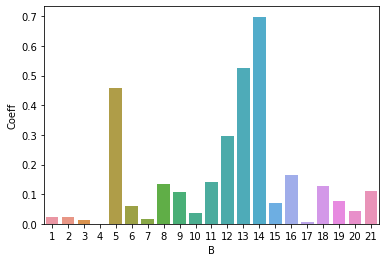

In [46]:
x = logmodel.coef_.reshape((21,1))
r = X_train.columns.values.reshape((21,1))
df = pd.DataFrame(data = x ,  index = r ,  columns = ['Coeff'])
new = np.array(list(range(1,22))).reshape(21,1)                                       
df2 = pd.DataFrame(data=new,index=r,columns=['B'])
df = pd.concat([df,df2],axis=1)
df['Coeff'] = df['Coeff'].abs()
sns.barplot(data=df, x='B', y='Coeff')

In [47]:
#Coefficient dataframe of attributes
df

,Coeff,B
"(CRS_DEP_TIME,)",0.023075,1
"(DEP_TIME,)",0.023614,2
"(DISTANCE,)",0.012281,3
"(FL_NUM,)",0.000053,4
"(Weather,)",0.457514,5
"(DAY_WEEK,)",0.059264,6
"(DAY_OF_MONTH,)",0.017780,7
"(EWR,)",0.134731,8
"(JFK,)",0.106672,9
"(LGA,)",0.036362,10


In [48]:
#TTS of new model along with attribute information
newfinal = final.drop(['DISTANCE','FL_NUM','DAY_OF_MONTH','Flight Status','ORIGIN','DEST','CARRIER'],axis=1)
from sklearn.model_selection import train_test_split
X_ntrain, X_ntest, y_ntrain, y_ntest = train_test_split(newfinal.drop(['ontime'],axis=1),newfinal['ontime'],test_size=0.40,random_state=101)
X_ntrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 2056 to 863
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   CRS_DEP_TIME  1320 non-null   int64
 1   DEP_TIME      1320 non-null   int64
 2   Weather       1320 non-null   int64
 3   DAY_WEEK      1320 non-null   int64
 4   EWR           1320 non-null   uint8
 5   JFK           1320 non-null   uint8
 6   LGA           1320 non-null   uint8
 7   CO            1320 non-null   uint8
 8   DH            1320 non-null   uint8
 9   DL            1320 non-null   uint8
 10  MQ            1320 non-null   uint8
 11  OH            1320 non-null   uint8
 12  RU            1320 non-null   uint8
 13  UA            1320 non-null   uint8
 14  US            1320 non-null   uint8
 15  BWI           1320 non-null   uint8
 16  DCA           1320 non-null   uint8
 17  IAD           1320 non-null   uint8
dtypes: int64(4), uint8(14)
memory usage: 69.6 KB


In [49]:
#Report of new model
logmodel = LogisticRegression()
logmodel.fit(X_ntrain,y_ntrain)
predictions = logmodel.predict(X_ntest)
from sklearn.metrics import classification_report
print(classification_report(y_ntest,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.47      0.64       169
         1.0       0.89      1.00      0.94       712

    accuracy                           0.90       881
   macro avg       0.94      0.74      0.79       881
weighted avg       0.91      0.90      0.88       881



D:\Softwares\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
new = data
new.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [51]:
#Finding ideal times
allontime = []
for x in new['CRS_DEP_TIME'].value_counts().index.values:
    try:
        ontime = new[new['CRS_DEP_TIME'] == x]['Flight Status'].value_counts()['ontime']
    except:
        print(x,'All delayed')
    try:
        late = new[new['CRS_DEP_TIME'] == x]['Flight Status'].value_counts()['delayed']
    except:
        allontime.append(x)
        print(x,'All ontime')  

1000 All ontime
1200 All ontime
1330 All ontime
845 All ontime
925 All ontime
759 All ontime
1605 All delayed
1520 All ontime
1725 All ontime


In [52]:
#Number of entries of each time
for x in allontime:
    b = new[new['CRS_DEP_TIME']==x].shape[0]
    print(x,b)

1000 23
1200 22
1330 19
845 3
925 3
759 2
1520 1
1725 1
